## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [1]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean
from PIL import Image
import random

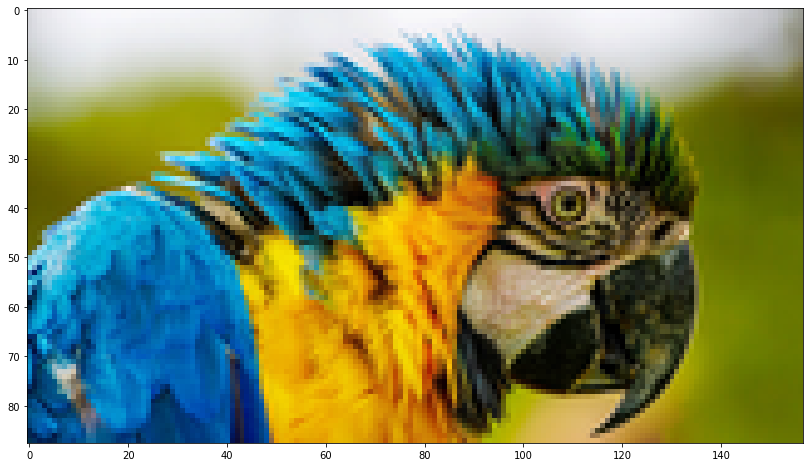

In [2]:
# Load an image.
#imagex = image.imread("parrot.jpeg")# You may want to test with a smaller image, it will be faster
imagex = Image.open('parrot.jpeg') 
rsize = imagex.resize((np.array(imagex.size)/16).astype(int),Image.ANTIALIAS) # Use PIL to resize
imagex = np.asarray(rsize)

plt.figure(figsize = (15,8))
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image.

In [3]:
# THIS IS THE PART YOU ARE TO REPLACE
cluster_count = 5 # How many clusters we want
kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
kmeans_cluster.fit(image_2d) # Apply it to the data
cluster_centers = kmeans_cluster.cluster_centers_ # we're not using these
cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel

In [4]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[105. 111.   2.   0.]
[219. 222. 227.   1.]
[26. 39. 22.  2.]
[209. 161.   5.   3.]
[  4. 120. 178.   4.]


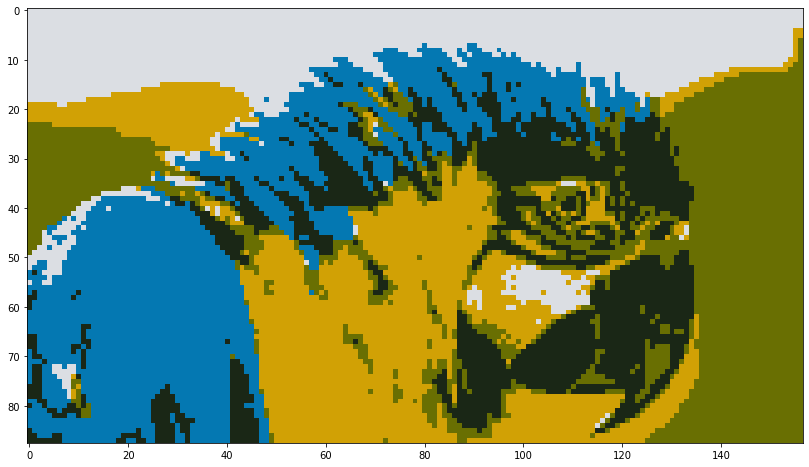

In [5]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.imshow(image_out)
# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')

In [6]:
# # THIS IS THE PART YOU ARE TO REPLACE
# cluster_count = 5 # How many clusters we want
# kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
# kmeans_cluster.fit(image_2d) # Apply it to the data
# cluster_centers = kmeans_cluster.cluster_centers_ # we're not using these
# cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel

In [7]:

#     Compute k-means clustering.
#     def fit(self,data):
#     1: Choose random centroids from the dataset and set them to dictionary values.
#     psudeo:  
#     for i in rage iterations:
#         reset classification dictionary 
#         for c in the #centroids:
#             set reset the classification value
#         loop through feature sets:
#             1)calculate the distances between them(np.linalg.norm)
#             2)calculate index of min distance -> classifier
#             3)set the classifier to the feature set
        
#         prev centroid = centroids we just used
        
#         loop through centroid and calculate new centroids
#         if the percentage change>thresh start again
#         otherwise we have the final centroids
        
        
        

In [8]:
class K_Means:
    def __init__(self,n_clusters,max_iter=100,e=0.0001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.e = e
        
    
    #clusters the data into a dictionary
    def fit(self,x):
#         first attempt was to use random px. sometimes worked sometimes collided
#         choices = x.copy() 
#         np.random.shuffle(choices)
        
        #choosing centroids by using px coordinate formula from visual computing to get distinct 
        #pixels in different clusters. this relies on reading coordinates of original image:
        self.centroids = {}

        #green
        self.centroids[0] = x[6420]
        
        #sky
        self.centroids[1] = x[0]
        
        #blue
        self.centroids[2] = x[9940]
         
        #black
        self.centroids[3] = x[11095]
          
        #yellow
        self.centroids[4] = x[12620]
        
        
        
#         for i in range(self.n_clusters):
#             self.centroids[i] = choices[i]
             
        #Main loop of the algorithm:
        for i in range(self.max_iter):
            self.classes = {}
            self.labels_ = list()
            
            #resetting the centroids
            for i in range(self.n_clusters):
                self.classes[i] = []
            
            #loop through all feature vectors:
            for dataPoints in x:
                #compute the distance of the datapoint 
                distances = [np.linalg.norm(dataPoints-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                #I can just append the appropriate label fo the class in order
                self.labels_.append(classification)
                self.classes[classification].append(dataPoints)
                
            #now re-calculate the centroids:
            previous = dict(self.centroids)
        
            for i in range(len(self.classes)):
                self.centroids[i] = np.average(self.classes[i], axis = 0)
        
            #check if we need to stop classifying
            isOptimal = True
        
            for i in self.centroids:
                original = previous[i]
                current = self.centroids[i]
                if np.sum((current-original)/original*100.0)> self.e:
                    isOptimal = False
            
            if isOptimal:
                break

In [9]:
cluster_count = 5 # How many clusters we want
kmeans_cluster = K_Means(n_clusters=cluster_count) # Create a clusterer
kmeans_cluster.fit(image_2d) # Apply it to the data
cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel

In [10]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[105. 111.   2.   0.]
[219. 222. 227.   1.]
[  4. 120. 178.   2.]
[26. 39. 22.  3.]
[209. 161.   5.   4.]


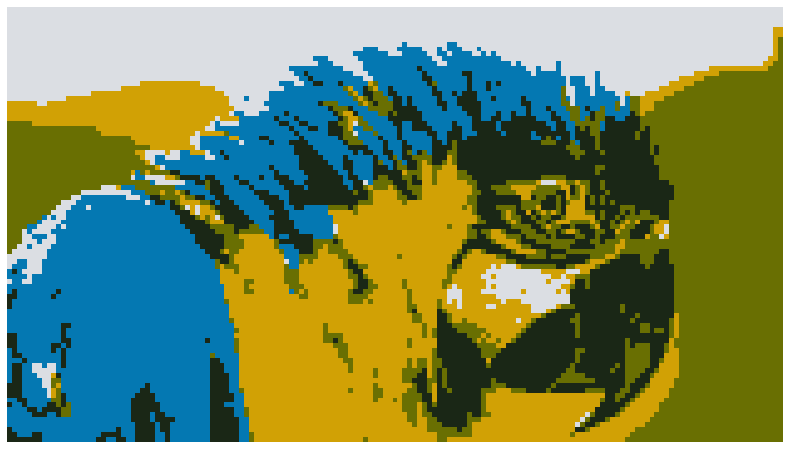

In [11]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)
# Use the  following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')